## Linear Regression - Boston Data

#### import libraries

In [229]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston,load_diabetes
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import shapiro, kstest, normaltest

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### 1. Problem Statement

In [ ]:
To Predict boston house prices by using  various variables:
    CRIM	
    ZN	
    INDUS	
    CHAS	
    NOX	
    RM	
    AGE	
    DIS	RAD
    TAX	
    PTRATIO	
    B	
    LSTAT

### 2. Data Gathering

In [230]:
boston_data = load_boston()
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [231]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['TARGET'] = boston_data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 3. Exploratory Data Analysis

In [ ]:
EDA on each and every column/feature
CRIM	
ZN	
INDUS	
CHAS	
NOX	
RM	
AGE	
DIS	RAD
TAX	
PTRATIO	
B	
LSTAT

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 4.Feature Engineering

In [ ]:
Scaling
Binning
Transformation:
    log
    square root
    cube root

### 5. Feature Selection

In [ ]:
Dimensionality reduction techniques:
    1. Feature Selection:
        1. Filter Method:
            1. Correlation:
                1. Pearson Corr Coefficient
                
            2. VIF
        2. Wrapper Method
        3. Embedded Method:
            1. Regularization:
                1. Lasso Regression

    2. Feature Extraction:
        1. PCA
        2. LDA
    

#### 1. Linearity 

In [17]:
df.cov() # Covariance Matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


In [18]:
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
TARGET        84.586724
dtype: float64

In [19]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


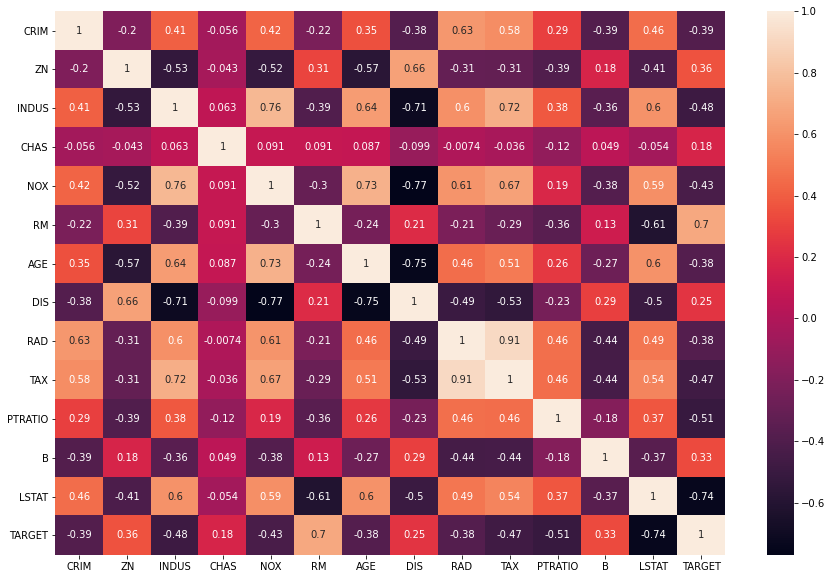

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True)
plt.savefig('Correlation.png')

In [21]:
correlation = df.corr().tail(1)

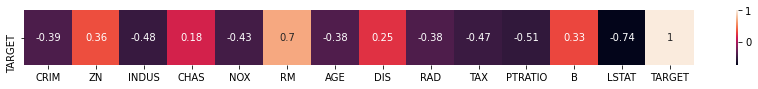

In [22]:
plt.figure(figsize = (15,1))
sns.heatmap(correlation,annot = True)
plt.savefig('Correlation_target.png')

#### How to Handle Linearity if get violated:

#### 1. Log Transformation

In [376]:
df3 = df.copy()
df4 = np.log(df3)
df4.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.567242,0.219731,-0.553887,NaN,-0.515251,0.610437,-0.388498,0.405721,-0.434513,-0.557184,-0.492654,0.34342,-0.82296,1.0


#### 2. Square root 

In [378]:
df3 = df.copy()
df4 = np.sqrt(df3)
df4.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.539106,0.395878,-0.541344,0.168186,-0.479652,0.660919,-0.401809,0.330405,-0.423756,-0.523748,-0.509367,0.361348,-0.816253,1.0


#### 3. cube root

In [379]:
df3 = df.copy()
df4 = np.cbrt(df3)
df4.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.565883,0.40066,-0.552023,0.165247,-0.493867,0.645864,-0.402445,0.35676,-0.432328,-0.537923,-0.505953,0.363645,-0.82781,1.0


### 2. No Multicolinearity

In [232]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

In [233]:
df.shape[1]

14

In [234]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [235]:
for i in range(df.shape[1] -1):
    vif = variance_inflation_factor(df.to_numpy(), i)
    print(f"VIF for {df.columns[i]}:",vif)

VIF for CRIM: 2.1314042398916406
VIF for ZN: 2.9100040831335887
VIF for INDUS: 14.485874343285056
VIF for CHAS: 1.176265953292883
VIF for NOX: 74.00426852716569
VIF for RM: 136.1017425464841
VIF for AGE: 21.39886253165994
VIF for DIS: 15.430455486916713
VIF for RAD: 15.369979849775836
VIF for TAX: 61.93971317434026
VIF for PTRATIO: 87.22723281176584
VIF for B: 21.35101506934191
VIF for LSTAT: 12.615187641345367


In [236]:
x = df.drop('TARGET',axis = 1)
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

<AxesSubplot:>

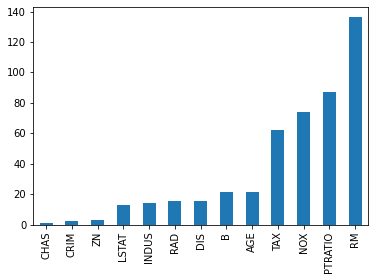

In [237]:
vif_list = []
for i in range(df.shape[1] -1):
    vif = variance_inflation_factor(df.to_numpy(), i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list,index = x.columns)
s1.sort_values().plot(kind = 'bar')

<AxesSubplot:>

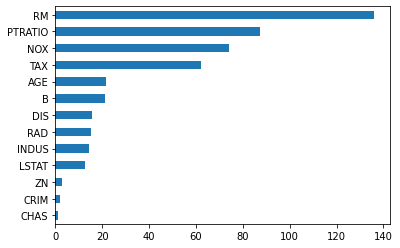

In [238]:
vif_list = []
for i in range(df.shape[1] -1):
    vif = variance_inflation_factor(df.to_numpy(), i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list,index = x.columns)
s1.sort_values().plot(kind = 'barh')

# 5. Model Training

#### Train Test Split

In [239]:
x = df.drop('TARGET',axis = 1) # 2D
y = df['TARGET'] # 1D

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


In [240]:
y_train

50     19.7
367    23.1
34     13.5
78     21.2
172    23.1
       ... 
320    23.8
15     19.9
484    20.6
125    21.4
265    22.8
Name: TARGET, Length: 404, dtype: float64

In [241]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
174,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22


In [242]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
208    24.4
174    22.6
108    19.8
242    22.2
102    18.6
Name: TARGET, Length: 102, dtype: float64

##### Instantiating Linear Regression model

In [243]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train) # Gradient Descent, m and c

LinearRegression()

In [244]:
linear_reg.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [245]:
linear_reg.intercept_

36.53305138282457

<AxesSubplot:>

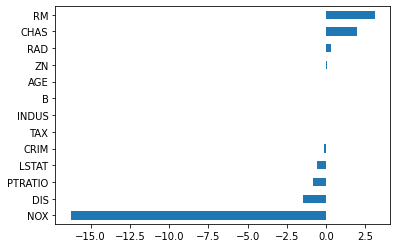

In [247]:
s1 = pd.Series(linear_reg.coef_,index= x.columns)
s1.sort_values().plot(kind = 'barh')

## Evaluation

In [248]:
y_pred = linear_reg.predict(x_test)

In [249]:
y_pred[:10]

array([31.0789639 , 31.721694  , 30.87314928, 22.28234976, 18.85606115,
       16.47132499, 36.05004157, 14.64032337, 25.24078574, 36.92073901])

In [250]:
y_test[:10]

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
433    14.3
161    50.0
129    14.3
269    20.7
226    37.6
Name: TARGET, dtype: float64

### Evaluation on Testing Data

In [251]:

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_test, y_pred)
print("R Squared Value is :",r_squared)

Mean Squared Error : 34.413968453138466
Root Mean Squared Error : 5.866341999333014
Mean Absolute Error : 4.0614191829547055
R Squared Value is : 0.6709339839115638


In [252]:
r_squared = linear_reg.score(x_test,y_test) # r2 value
print("R Squared Value is :",r_squared)

R Squared Value is : 0.6709339839115638


##### Evaluation on Trainig Data

In [253]:
y_pred_train = linear_reg.predict(x_train)


In [254]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 19.23085887937306
Root Mean Squared Error : 4.385300318036732
Mean Absolute Error : 3.083095582817763
R Squared Value is : 0.750121534530608


In [255]:
r_squared = linear_reg.score(x_train, y_train) # r2 value
print("R Squared Value is :",r_squared)

R Squared Value is : 0.750121534530608


In [45]:
row_10 = x_train.iloc[10]
row_10

CRIM         0.10084
ZN           0.00000
INDUS       10.01000
CHAS         0.00000
NOX          0.54700
RM           6.71500
AGE         81.60000
DIS          2.67750
RAD          6.00000
TAX        432.00000
PTRATIO     17.80000
B          395.59000
LSTAT       10.16000
Name: 111, dtype: float64

In [46]:
y_pred_new = linear_reg.predict([row_10])
y_pred_new

array([26.38641515])

## R-Squared Values for all variables

In [256]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [257]:
x_train.iloc[:,:3]

,CRIM,ZN,INDUS
50,0.08873,21.0,5.64
367,13.52220,0.0,18.10
34,1.61282,0.0,8.14
78,0.05646,0.0,12.83
172,0.13914,0.0,4.05
...,...,...,...
320,0.16760,0.0,7.38
15,0.62739,0.0,8.14
484,2.37857,0.0,18.10
125,0.16902,0.0,25.65


In [258]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


In [259]:
correlation.T['TARGET']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
TARGET     1.000000
Name: TARGET, dtype: float64

In [260]:
r_squared_values_list = []
adj_r2_list = []
for i in range(1,x_train.shape[1]+1):
    linear_reg = LinearRegression()
    linear_reg.fit(x_train.iloc[:,:i], y_train) 
    r_squared = linear_reg.score(x_train.iloc[:,:i], y_train) 
    r_squared_values_list.append(r_squared)
    
    adjusted_r2 = 1 - (((1-r_squared)*(x_train.shape[0] - 1))/(x_train.shape[0] -x_train.shape[1]-1 ))
    
    adj_r2_list.append(adjusted_r2)
r2_df = pd.DataFrame({'Correlation':correlation.T['TARGET'],"R2 Values":r_squared_values_list, "Adj R2":adj_r2_list}, 
                     index=x_train.columns)
r2_df

,Correlation,R2 Values,Adj R2
CRIM,-0.388305,0.154127,0.125931
ZN,0.360445,0.266503,0.242053
INDUS,-0.483725,0.328123,0.305727
CHAS,0.175260,0.357165,0.335737
NOX,-0.427321,0.359943,0.338607
RM,0.695360,0.568250,0.553859
AGE,-0.376955,0.569521,0.555172
DIS,0.249929,0.615983,0.603182
RAD,-0.381626,0.616248,0.603456
TAX,-0.468536,0.625064,0.612566


In [261]:
x_train.shape[1]+1

14

In [262]:
x_train.iloc[:,:1]

,CRIM
50,0.08873
367,13.52220
34,1.61282
78,0.05646
172,0.13914
...,...
320,0.16760
15,0.62739
484,2.37857
125,0.16902


In [263]:
x_train.iloc[:,:1].shape[1]

1

In [264]:
r_squared_values_list = []
adj_r2_list = []
row_count = x_train.shape[0] 
for i in range(1,x_train.shape[1]+1):
    linear_reg = LinearRegression()
    linear_reg.fit(x_train.iloc[:,:i], y_train) 
    r_squared = linear_reg.score(x_train.iloc[:,:i], y_train) 
    r_squared_values_list.append(r_squared)
    
    adjusted_r2 = 1 - (((1-r_squared)*(row_count - 1))/(row_count - x_train.iloc[:,:i].shape[1] -1 ))
    
    adj_r2_list.append(adjusted_r2)
r2_df = pd.DataFrame({'Correlation':correlation.T['TARGET'],"R2 Values":r_squared_values_list, "Adj R2":adj_r2_list}, 
                     index=x_train.columns)
r2_df

,Correlation,R2 Values,Adj R2
CRIM,-0.388305,0.154127,0.152022
ZN,0.360445,0.266503,0.262844
INDUS,-0.483725,0.328123,0.323084
CHAS,0.175260,0.357165,0.350721
NOX,-0.427321,0.359943,0.351902
RM,0.695360,0.568250,0.561725
AGE,-0.376955,0.569521,0.561912
DIS,0.249929,0.615983,0.608205
RAD,-0.381626,0.616248,0.607482
TAX,-0.468536,0.625064,0.615523


In [265]:
0.388305 ** 2

0.150780773025

### 1. Assumption of Linear Regression

## Normality of Residual

In [266]:
y_train[:5]

50     19.7
367    23.1
34     13.5
78     21.2
172    23.1
Name: TARGET, dtype: float64

In [267]:
y_pred_train[:5]

array([21.02958601, 12.21844467, 13.74785342, 20.7351517 , 23.41262356])

In [268]:
y_train[:5] - y_pred_train[:5]

50     -1.329586
367    10.881555
34     -0.247853
78      0.464848
172    -0.312624
Name: TARGET, dtype: float64

In [269]:
mse = (((y_train - y_pred_train) ** 2).sum())/404
mse

19.23085887937306

In [270]:
mae = ((np.abs(y_train - y_pred_train)).sum())/404
mae

3.083095582817763

In [271]:
residual = y_train - y_pred_train
residual

50     -1.329586
367    10.881555
34     -0.247853
78      0.464848
172    -0.312624
         ...    
320    -1.045994
15      0.008068
484     1.432540
125    -1.006342
265    -5.770612
Name: TARGET, Length: 404, dtype: float64

### 1. Kdeplot

<AxesSubplot:xlabel='TARGET', ylabel='Density'>

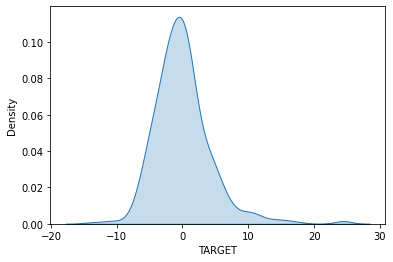

In [272]:
sns.kdeplot(residual,fill= True)

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

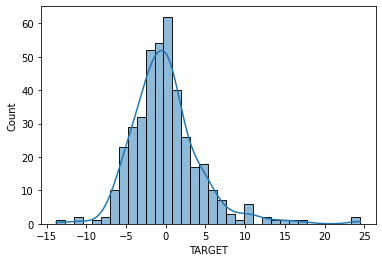

In [273]:
sns.histplot(residual,kde=True)

In [274]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:xlabel='AGE', ylabel='Count'>

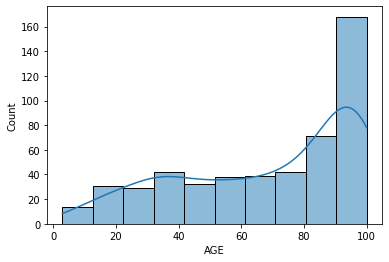

In [275]:
sns.histplot(df['AGE'],kde=True)

<AxesSubplot:ylabel='Count'>

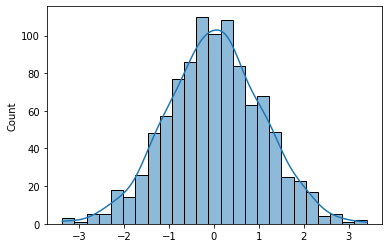

In [276]:
array = np.random.randn(1000)
sns.histplot(array,kde=True)

### 3. QQ-Plot

In [277]:
import statsmodels.api as sm

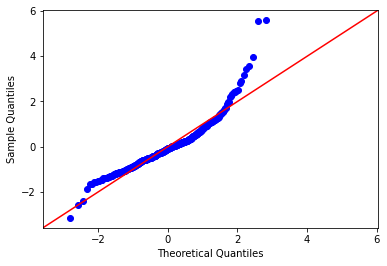

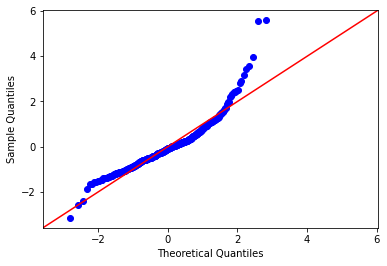

In [69]:
sm.qqplot(residual,line = '45',fit= True)

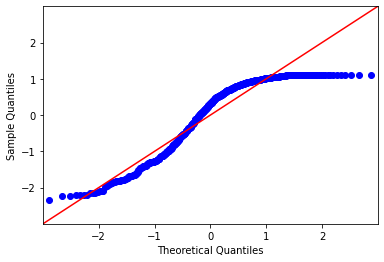

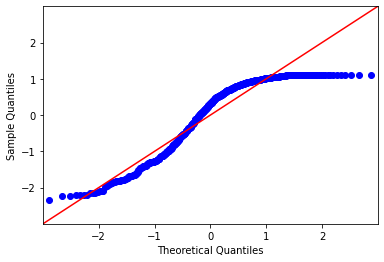

In [278]:
sm.qqplot(df['AGE'],line = '45',fit= True)

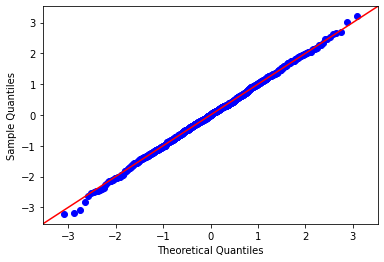

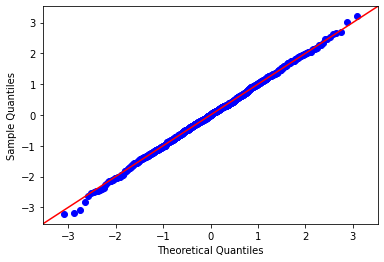

In [279]:
sm.qqplot(array,line = '45',fit= True)

### 3. Skewness

In [ ]:
Positive Skewness >> Tail of the distribution is longer towards right hand side

Negative Skewness >> Tail of the distribution is longer towards left hand side
Symmetrical Data >> Bell Shape Curve

-0.5 to +0.5 >> Symmetrical Distribution(0.05, -0.05, -0.3, 0, 0.08,0.3,0.4)
-1 to -0.5   >> Negatively Skewed Data >> (-0.6, -0.8,-0.9)
0.5 to +1.0   >> Positively Skewed Data >> (0.6, 0.8,0.9)


Skew > 1.0 : Highly Positively Skewed Data(1.45, 1.8)
Skew < -1.0 : Highly Negatively Skewed Data(1.45, 1.8)
    
Mean > Median > Mode >> Positively Skewed Data
Mean < Median < Mode >> Negatively Skewed Data

<AxesSubplot:xlabel='TARGET', ylabel='Density'>

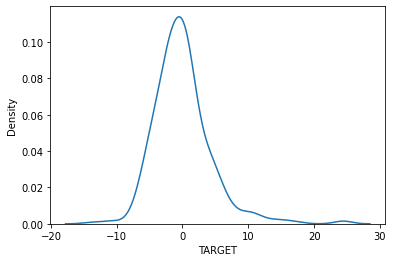

In [282]:
sns.kdeplot(residual)

In [283]:
residual.skew()

1.4594428196679918

In [286]:
from scipy.stats import skew

In [287]:
skew(df['AGE'])

-0.5971855948016143

In [73]:
df['AGE'].skew()

-0.5989626398812962

In [288]:
pd.Series(array).skew()

-0.03266407572164198

In [289]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

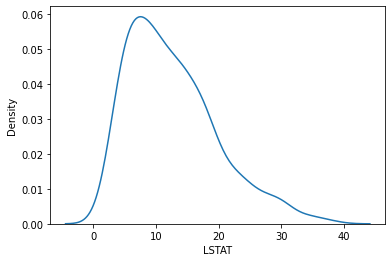

In [290]:
sns.kdeplot(df['LSTAT'])

<AxesSubplot:xlabel='AGE', ylabel='Density'>

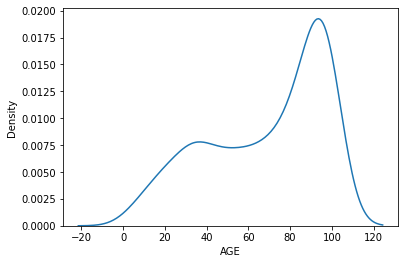

In [291]:
sns.kdeplot(df['AGE'])

In [292]:
mean = df['AGE'].mean()
print("Mean :",mean)

median = df['AGE'].median()
print("median :",median)

mode = df['AGE'].mode()[0]
print("mode :",mode)

# Mean < Median < Mode >> Negatively Skewed Data

Mean : 68.57490118577076
median : 77.5
mode : 100.0


In [293]:
mean = df['LSTAT'].mean()
print("Mean :",mean)

median = df['LSTAT'].median()
print("median :",median)

mode = df['LSTAT'].mode()[0]
print("mode :",mode)

# Mean > Median > Mode >> Positively Skewed Data

Mean : 12.653063241106722
median : 11.36
mode : 6.36


In [294]:
s1 = pd.Series(residual)
s1
mean = s1.mean()
print("Mean :",mean)

median = s1.median()
print("median :",median)

mode = s1.mode()[0]
print("mode :",mode)


Mean : 1.178375329107097e-15
median : -0.34314884248257815
mode : -13.8106674778141


### BoxCox Transformation

If Highly negative or Postive skewed Data then use BoxCox Transformation

Only for Positive values

In [307]:
from scipy.stats import boxcox

<AxesSubplot:ylabel='Density'>

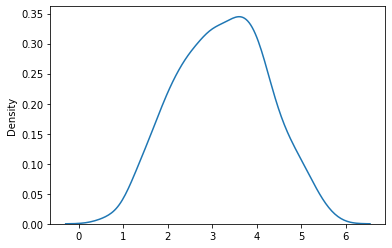

In [311]:
boxcox_array = boxcox(df['LSTAT'])[0]
sns.kdeplot(boxcox_array)

In [313]:
skew(df['LSTAT'])

0.9037707431346133

In [314]:
skew(boxcox_array)

-0.027803169903343142

## Hypothesis Testing

In [ ]:
Hypothesis >> India Will win T20 Match 

Null Hypothesis: We are Accepting NULL Hypothesis:
                Null Hypothesis is True
            
Alternate Hypothesis:  
                Alternate Hypothesis is True
                NULL Hypothesis is False
                We are Rejecting NULL Hypothesis
                We are accepting Alternate Hypothesis

In [ ]:
NULL Hypothesis >> Data is Normally Distributed
Alternate Hypothesis >> Data is Not normally Distributed

p_val >> 0 to 1
Significant p_val == 0.05

p_val >= 0.05  : Null Hypothesis is TRUE
p_val < 0.05   : Null Hypothesis is False
                 Alternate Hypothesisis TRUE
        
p_val >= 0.05  : Data is Normally Distributed
p_val < 0.05   : Data is Not normally Distributed
    

In [ ]:
Hypothesis Tesing to Check Normality:
    1. shapiro
    2. kstest
    3. normaltest

## 1. Shapiro

In [295]:
from scipy.stats import shapiro

In [296]:
stat, p_val = shapiro(df['AGE'])
p_val

2.2305888882906016e-18

In [297]:
_, p_val = shapiro(df['AGE'])
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 2.2305888882906016e-18
Data is not normally Distributed
Alternate Hypothesis is TRUE
Null Hypothesis is FALSE


In [298]:
_, p_val = shapiro(df['LSTAT'])
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 8.285112504911873e-14
Data is not normally Distributed
Alternate Hypothesis is TRUE
Null Hypothesis is FALSE


In [299]:
_, p_val = shapiro(residual)
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 8.433757978012352e-15
Data is not normally Distributed
Alternate Hypothesis is TRUE
Null Hypothesis is FALSE


In [300]:
_, p_val = shapiro(array)
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 0.9754912257194519
Data is Normally Distributed
Null Hypothesis is TRUE


## 2. kstest

In [302]:
from scipy.stats import kstest

In [303]:
_, p_val = kstest(df['AGE'], 'norm')
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 0.0
Data is not normally Distributed
Alternate Hypothesis is TRUE
Null Hypothesis is FALSE


In [304]:
_, p_val = kstest(df['LSTAT'], 'norm')
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 0.0
Data is not normally Distributed
Alternate Hypothesis is TRUE
Null Hypothesis is FALSE


In [305]:
_, p_val = kstest(residual, 'norm')
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 9.991282259383218e-37
Data is not normally Distributed
Alternate Hypothesis is TRUE
Null Hypothesis is FALSE


In [306]:
_, p_val = kstest(array, 'norm')
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 0.47592354802821235
Data is Normally Distributed
Null Hypothesis is TRUE


In [96]:
array1 = np.random.randn(500)

<AxesSubplot:ylabel='Density'>

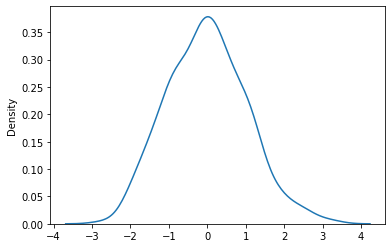

In [97]:
sns.kdeplot(array1)

In [98]:
_, p_val = kstest(array, 'norm')
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 0.5863584423764563
Data is Normally Distributed
Null Hypothesis is TRUE


In [99]:
_, p_val = kstest(array1, 'norm')
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 0.38709180658679077
Data is Normally Distributed
Null Hypothesis is TRUE


### 3. normaltest

In [315]:
from scipy.stats import normaltest

In [316]:
_, p_val = normaltest(df['AGE'])
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 1.6191768966045395e-25
Data is not normally Distributed
Alternate Hypothesis is TRUE
Null Hypothesis is FALSE


In [317]:
_, p_val = normaltest(df['LSTAT'])
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 3.7806593212903944e-13
Data is not normally Distributed
Alternate Hypothesis is TRUE
Null Hypothesis is FALSE


In [318]:
_, p_val = normaltest(residual)
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 2.0699615562010085e-31
Data is not normally Distributed
Alternate Hypothesis is TRUE
Null Hypothesis is FALSE


In [319]:
_, p_val = normaltest(array)
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 0.8587320016706439
Data is Normally Distributed
Null Hypothesis is TRUE


In [320]:
stat, p_val = normaltest(array1)
print("P Value is :",p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print("Null Hypothesis is TRUE")
else:
    print("Data is not normally Distributed")
    print("Alternate Hypothesis is TRUE")
    print("Null Hypothesis is FALSE")

P Value is : 0.11719059884324433
Data is Normally Distributed
Null Hypothesis is TRUE


### 4. Homoscedasticity

In [ ]:
Homoscedasticity >> No Heteroscedasticity

1. Assumption of equal variance
2. Homoscedasticity >> Constant Error or Constant Residual
3. Constant Error >> Constant Deviation from Zero Value
4. Fitted Values Vs Residual


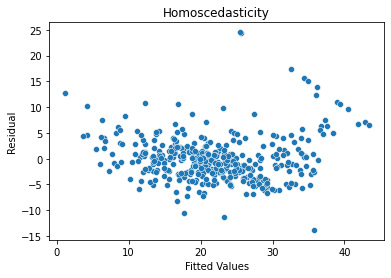

In [326]:
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Homoscedasticity")
sns.scatterplot(x = y_pred_train, y = residual)
plt.savefig("Homoscedasticity.png")

## Testing on User Inputs

In [327]:
linear_reg.predict(x_test[10:15])

array([21.24395893, 31.05887245, 27.83837442, 33.90940352, 33.94484713])

In [328]:
x_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [329]:
# x_test.head(1).T

In [330]:
CRIM     = 0.05479
ZN       = 33.00000
INDUS    = 2.18000
CHAS     = 0.00000
NOX      = 0.47200
RM       = 6.61600
AGE      = 58.10000
DIS      = 3.37000
RAD      = 7.00000
TAX      = 222.00000
PTRATIO  = 18.40000
B        = 393.36000
LSTAT    = 8.93000
# Target = ?

test_array = np.array([CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, 
                      DIS, RAD, TAX, PTRATIO, B, LSTAT],ndmin = 2)
test_array

predicted_value = linear_reg.predict(test_array)[0]
print("Predicted_value :",predicted_value)

Predicted_value : 31.07896389936413


In [114]:
CRIM     = 0.05479
ZN       = 33.00000
INDUS    = 2.18000
CHAS     = 0.00000
NOX      = 0.47200
RM       = 6.61600
AGE      = 58.10000
DIS      = 3.37000
RAD      = 7.00000
TAX      = 222.00000
PTRATIO  = 18.40000
B        = 393.36000
LSTAT    = 8.93000

test_array = np.array([CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, 
                      DIS, RAD, TAX, PTRATIO, B, LSTAT],ndmin = 2)

def get_predicted_value(test_array):

    predicted_value = np.around(linear_reg.predict(test_array)[0],3)
    print("Predicted_value :",predicted_value)
    

get_predicted_value(test_array)

Predicted_value : 31.079


In [331]:
CRIM     = 0.06479
ZN       = 32.00000
INDUS    = 2.56000
CHAS     = 0.00000
NOX      = 0.56200
RM       = 7.78600
AGE      = 55.10000
DIS      = 3.86000
RAD      = 9.00000
TAX      = 215.00000
PTRATIO  = 19.40000
B        = 378.36000
LSTAT    = 8.876543000

test_array = np.array([CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, 
                      DIS, RAD, TAX, PTRATIO, B, LSTAT],ndmin = 2)

def get_predicted_value(test_array):

    predicted_value = np.around(linear_reg.predict(test_array)[0],3)
    print("Predicted_value :",predicted_value)
    
get_predicted_value(test_array)

Predicted_value : 32.141


In [332]:
import pickle

with open("Linear_Reg_Model.pkl","wb") as f:
    pickle.dump(linear_reg,f)

# Regularization

In [333]:
linear_reg.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [335]:
s1 = pd.Series(linear_reg.coef_,index= x.columns)
s1

CRIM       -0.128181
ZN          0.063198
INDUS      -0.007576
CHAS        1.974515
NOX       -16.271989
RM          3.108456
AGE         0.016292
DIS        -1.483014
RAD         0.303988
TAX        -0.012082
PTRATIO    -0.820306
B           0.011419
LSTAT      -0.581626
dtype: float64

<AxesSubplot:>

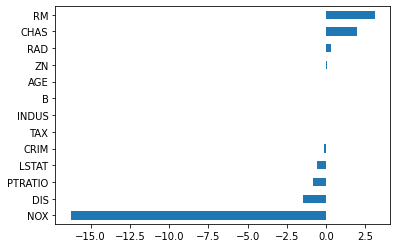

In [336]:
s1.sort_values().plot(kind = 'barh')

### 1. Lasso Regression

In [337]:
lasso_model = Lasso() # alpha = 1
lasso_model.fit(x_train, y_train)

Lasso()

In [338]:
lasso_model.score(x_train, y_train)

0.6887196863683032

In [339]:
lasso_model.score(x_test, y_test)

0.5350073630794524

In [348]:
## TRain Data Evaluation
lasso_model = Lasso(alpha=1)
lasso_model.fit(x_train, y_train)

y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 23.95639725149266
Root Mean Squared Error : 4.894527275589815
Mean Absolute Error : 3.4261161247516827
R Squared Value is : 0.6887196863683032


In [349]:
# Testing Data Evaluation
y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_test, y_pred)
print("R Squared Value is :",r_squared)

Mean Squared Error : 48.6292754509928
Root Mean Squared Error : 6.9734693984409795
Mean Absolute Error : 4.858126196863405
R Squared Value is : 0.5350073630794524


CRIM      -0.088170
ZN         0.069682
INDUS     -0.007353
CHAS       0.000000
NOX       -0.000000
RM         0.161862
AGE        0.035206
DIS       -0.699412
RAD        0.268211
TAX       -0.015352
PTRATIO   -0.547228
B          0.010045
LSTAT     -0.802147
dtype: float64


<AxesSubplot:>

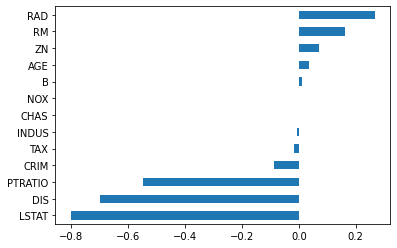

In [350]:
s1 = pd.Series(lasso_model.coef_, index = x.columns)
print(s1)
s1.sort_values().plot(kind = 'barh')

## 2. Ridge Regression

In [354]:
## Train Data Evaluation
ridge_model = Ridge(alpha=3)
ridge_model.fit(x_train, y_train)

y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 19.64604026784903
Root Mean Squared Error : 4.432385392522748
Mean Absolute Error : 3.098857211002934
R Squared Value is : 0.7447268254905919


In [355]:
# Testing Data Evaluation
y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_test, y_pred)
print("R Squared Value is :",r_squared)

Mean Squared Error : 35.566722048968664
Root Mean Squared Error : 5.96378420543271
Mean Absolute Error : 4.1193635838881875
R Squared Value is : 0.6599113657607976


CRIM      -0.123780
ZN         0.064814
INDUS     -0.051645
CHAS       1.660752
NOX       -4.830113
RM         3.167039
AGE        0.005955
DIS       -1.312996
RAD        0.278531
TAX       -0.012985
PTRATIO   -0.685277
B          0.012089
LSTAT     -0.600072
dtype: float64


<AxesSubplot:>

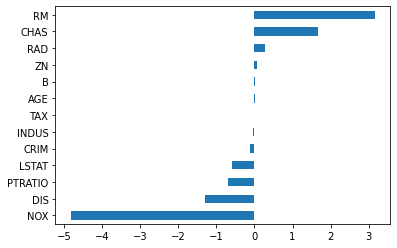

In [356]:
s1 = pd.Series(ridge_model.coef_, index = x.columns)
print(s1)
s1.sort_values().plot(kind = 'barh')

## Hyperparameter Tuning

#### 1. Lasso Regression

In [357]:
lasso_reg_model = Lasso()

hyperparameters = {"alpha" : np.arange(0.01, 5, 0.01)}
gscv_lasso_model = GridSearchCV(lasso_reg_model, hyperparameters, cv = 5)
gscv_lasso_model.fit(x_train, y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

In [358]:
gscv_lasso_model.best_params_

{'alpha': 0.01}

In [359]:
## TRain Data Evaluation
lasso_model = Lasso(alpha=0.01)
# lasso_model = gscv_lasso_model.best_estimator_ # alpha = 0.01
lasso_model.fit(x_train, y_train)

y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 19.266146838119298
Root Mean Squared Error : 4.389321910969768
Mean Absolute Error : 3.0755889569253525
R Squared Value is : 0.7496630162170804


In [360]:
# Testing Data Evaluation
y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_test, y_pred)
print("R Squared Value is :",r_squared)

Mean Squared Error : 34.73904210536334
Root Mean Squared Error : 5.893983551500915
Mean Absolute Error : 4.063690804860515
R Squared Value is : 0.6678256329575429


CRIM       -0.126788
ZN          0.063595
INDUS      -0.018618
CHAS        1.778444
NOX       -13.011436
RM          3.121017
AGE         0.013617
DIS        -1.429805
RAD         0.296943
TAX        -0.012378
PTRATIO    -0.781953
B           0.011623
LSTAT      -0.587682
dtype: float64


<AxesSubplot:>

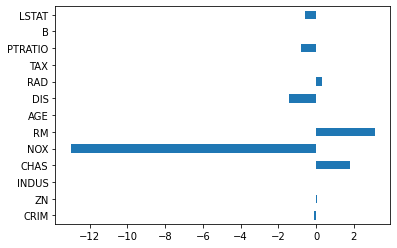

In [361]:
s1 = pd.Series(lasso_model.coef_, index = x.columns)
print(s1)
s1.plot(kind = 'barh')

### 2. Ridge Regression

In [362]:
ridge_reg_model = Ridge()

hyperparameters = {"alpha" : np.arange(0.01, 5, 0.01)}
gscv_ridge_model = GridSearchCV(ridge_reg_model, hyperparameters, cv = 5)
gscv_ridge_model.fit(x_train, y_train)
gscv_ridge_model.best_estimator_

Ridge(alpha=0.26)

In [363]:
## Train Data Evaluation
ridge_model = Ridge(alpha=0.26)
ridge_model.fit(x_train, y_train)

y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 19.254997196068246
Root Mean Squared Error : 4.388051640086776
Mean Absolute Error : 3.0774172318122415
R Squared Value is : 0.7498078904249214


In [367]:
# Testing Data Evaluation
y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_test, y_pred)
print("R Squared Value is :",r_squared)

Mean Squared Error : 34.58558868876499
Root Mean Squared Error : 5.880951342152475
Mean Absolute Error : 4.059891855240901
R Squared Value is : 0.6692929529652293


CRIM       -0.127053
ZN          0.063527
INDUS      -0.018256
CHAS        1.927123
NOX       -13.500402
RM          3.136254
AGE         0.013643
DIS        -1.441904
RAD         0.297293
TAX        -0.012277
PTRATIO    -0.786779
B           0.011586
LSTAT      -0.585141
dtype: float64


<AxesSubplot:>

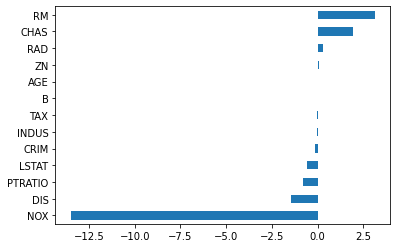

In [368]:
s1 = pd.Series(ridge_model.coef_, index = x.columns)
print(s1)
s1.sort_values().plot(kind = 'barh')

## Model Comparison

In [369]:
result = pd.DataFrame({"Linear Reg(train)":[34.41,5.8, 4.06, 0.67],
                       "Linear Reg(test)":[34.41,5.8, 4.06, 0.67],
                       'Lasso Reg(train)':[34.41,5.8, 4.06, 0.67], 
                        'Lasso Reg(test)':[34.41,5.8, 4.06, 0.67], 

                       'Ridge Reg(train)':[34.41,5.8, 4.06, 0.67],
                      'Ridge Reg(test)':[34.41,5.8, 4.06, 0.67]}, index = ['MSE', 'RMSE','MAE', 'R2'])
result

,Linear Reg(train),Linear Reg(test),Lasso Reg(train),Lasso Reg(test),Ridge Reg(train),Ridge Reg(test)
MSE,34.41,34.41,34.41,34.41,34.41,34.41
RMSE,5.80,5.80,5.80,5.80,5.80,5.80
MAE,4.06,4.06,4.06,4.06,4.06,4.06
R2,0.67,0.67,0.67,0.67,0.67,0.67


### How to Handle Linearity if get violated:

### 1. Log Transformation

In [370]:
data = load_diabetes()
dir(data)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [371]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [372]:
df.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


In [373]:
df3 = df.copy()
df4 = np.log(df3)
df4.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.567242,0.219731,-0.553887,NaN,-0.515251,0.610437,-0.388498,0.405721,-0.434513,-0.557184,-0.492654,0.34342,-0.82296,1.0


### 2. Sqaure Root Transformation

In [374]:
df3 = df.copy()
df4 = np.sqrt(df3)
df4.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.539106,0.395878,-0.541344,0.168186,-0.479652,0.660919,-0.401809,0.330405,-0.423756,-0.523748,-0.509367,0.361348,-0.816253,1.0


## 3. Cube Root 

In [375]:
df3 = df.copy()
df4 = np.cbrt(df3)
df4.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.565883,0.40066,-0.552023,0.165247,-0.493867,0.645864,-0.402445,0.35676,-0.432328,-0.537923,-0.505953,0.363645,-0.82781,1.0
